<a href="https://colab.research.google.com/github/AashrutiA/ML_Regression_analysis/blob/main/Bike_Sharing_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## **Importing Dataset**

In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
# Reading the dataset
df = pd.read_csv(r"C:\Users\ASUS VivoBooK\Desktop\alma\dataset\SeoulBikeData.csv", encoding = 'latin')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Creating a copy of the dataset
bike_df = df.copy()

In [ ]:
# Checking the names of the features in the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# The features after renaming them
print('The features in the dataset:')
bike_df.columns

The features in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike_df.shape

(8760, 14)



*   There are 8760 records and 14 features in the dataset. 
*   rented_bike_count is the dependent variable



In [ ]:
# Checking the basic information of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The hour feature is of int64 datatype. It should be converted to category as it is a categorical feature.

In [ ]:
# Checking the descriptive statistics of the dataset
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# Glance through the unique values
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


We have the records of bike sharing from 01/12/2017 to 30/11/2018 which  corresponds to 1 year.

### <b> Feature Description </b>

* ### **Date** : *The date of the day, type:str*
* ### **Rented Bike Count** - *Number of rented bikes per hour and it is also a dependent variable, type:int*
* ### **Hour** - *Hour of the day ranging from 0-23, type: int*
* ### **Temperature (°C)**-*Temperature in Celsius, type:float*
* ### **Humidity(%)** - *Humidity in the air in %, type: int*
* ### **Wind speed (m/s)** - *Speed of the wind in m/s, type: float*
* ### **Visibility (10m)** - *Visibility in m, type: int*
* ### **Dew point temperature(°C)** - *The temperature at which the water starts to condense out of the air, type: float*
* ### **Solar Radiation (MJ/m2)** - Electromagnetic radiation emitted by the Sun, type: float
* ### **Rainfall(mm)** - Amount of rainfall in mm, type: float *italicized text*
* ### **Snowfall(cm)** - *Amount of snowfall in cm, type: float*
* ### **Seasons** - *Season of the year, type: str*
* ### **Holiday** - *If the day is holiday or not, type: str*
* ### **Functioning Day** - *Whether the day is functional or not, type:str*




## Data Preparation and Cleaning

In [ ]:
# Missing Values Check
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64



*   As we can see from above result that there are no missing values




### <b> Duplicate Values </b>


In [ ]:
dup_no = len(bike_df[bike_df.duplicated()])
print('The number of duplicated rows in the dataset are: ', dup_no)

The number of duplicated rows in the dataset are:  0




*   There are not any duplicate rows and missing values in the dataset
*   Some feature names are quite lengthy, lets rename the features 



### **Renaming the features**


In [ ]:
# Renaming the feature names

bike_df = bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
#Converting the 'date' feature from string to datetime 
bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


In [ ]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['weekday'] = bike_df['date'].dt.weekday

In [ ]:
# creating a new column of'weekdays_weekend' 
bike_df = bike_df.drop(columns = ['date'], axis = 1)

In [ ]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


In [ ]:
print(bike_df['weekday'].unique())

[4 5 6 0 1 2 3]


In [ ]:
# since the weekdays are in range 0-6 lets convert it to 1-7
bike_df['weekday'] = np.array(bike_df['weekday']) + 1
bike_df['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4], dtype=int64)

In [ ]:
# Lets see the number of bikes rented per weekday
bike_rented_per_weekday = pd.DataFrame(bike_df['rented_bike_count'].groupby(bike_df['weekday']).sum().reset_index().sort_values('weekday', ascending = True))
bike_rented_per_weekday

,weekday,rented_bike_count
0,1,911743
1,2,858596
2,3,923956
3,4,861999
4,5,950334
5,6,885492
6,7,780194


In [ ]:
# The number of bikes rented each month of year 2017 and 2018
bike_df.groupby(['year', 'month']).agg({'rented_bike_count':['sum']}).reset_index()

,year,month,rented_bike_count
,,,sum
0,2017,12,185330
1,2018,1,150006
2,2018,2,151833
3,2018,3,380594
4,2018,4,524227
5,2018,5,707088
6,2018,6,896887
7,2018,7,734460
8,2018,8,651887


In [ ]:
# Changing the data type of hour feature to categorical
feat = ['hour']
for ele in feat:
  bike_df[ele] = bike_df[ele].astype('category')

In [ ]:
bike_df['months_string'] = bike_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df['days'] = bike_df['weekday'].map({1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}) 

In [ ]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday


In [ ]:
# dropping 'month' and 'weekday' and year column as the data is from Dec 2017 to Nov 2018
bike_df.drop(['month', 'weekday', 'year'], axis = 1, inplace = True)


C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


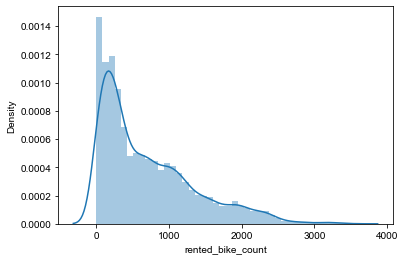

In [ ]:
# Checking the distribution of the dependent variable
sns.distplot(bike_df['rented_bike_count'])
sns.set(rc = {'figure.figsize': (10,5)})




*   From the above distribution plot the dependent variable looks skewed.
*   The rented bike count data is positively skewed



C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rented_bike_count'>

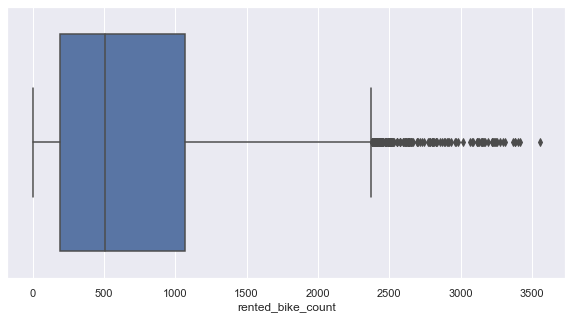

In [ ]:
sns.boxplot(bike_df['rented_bike_count'])



*   The above boxplot shows that there are outliers in the rented bike count data




<AxesSubplot:xlabel='rented_bike_count'>

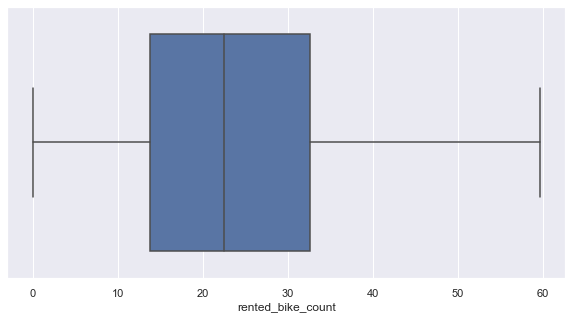

In [ ]:
# Applying square root transformation as it normalize the skewed data
sns.boxplot(x = np.sqrt(bike_df['rented_bike_count']))



* After square root transformation outliers have been removed.
* Our model works best when the data is normally distributed.







### Exploring Categorical Features

In [ ]:
categorical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes == 'O']
print('The categorical features in the dataset are:',categorical_feat)

The categorical features in the dataset are: ['seasons', 'holiday', 'func_day', 'months_string', 'days']


Finding relation between various features and dependent variable using Bar plot

Text(0.5, 1.0, 'Bike count on different seasons')

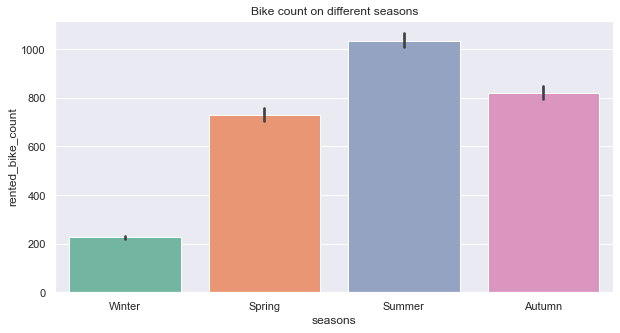

In [ ]:
# Finding relation between seasons and rented bike count
sns.barplot(x = 'seasons', y = 'rented_bike_count', data = bike_df, palette = 'Set2').set_title('Bike count on different seasons')


Rented bike count is significantly less in Winter whereas high on summer

Text(0.5, 1.0, 'Rented bike count on each day')

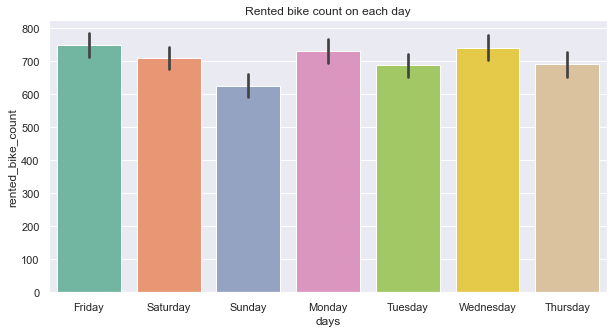

In [ ]:
# plot for the rented bike count against weekday
sns.barplot( x= 'days', y = 'rented_bike_count', data = bike_df, palette = 'Set2').set_title('Rented bike count on each day')

In all days, the bike count is more or less the same

Text(0.5, 1.0, 'Rented bike count on holiday v/s non holiday')

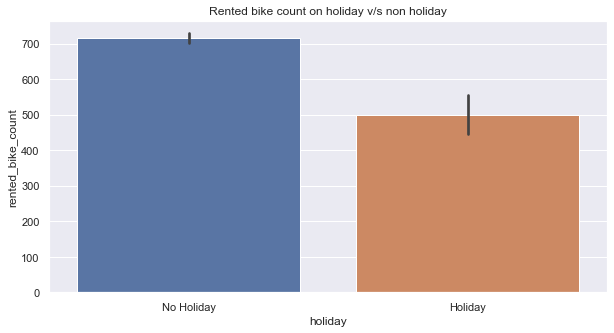

In [ ]:
# Understanding the rented bike count on holiday vs non holiday
sns.barplot(x = 'holiday',y='rented_bike_count', data = bike_df).set_title('Rented bike count on holiday v/s non holiday')

We see that people are renting bike on non holidays.

Text(0.5, 1.0, 'Rented bike count based on functioning day')

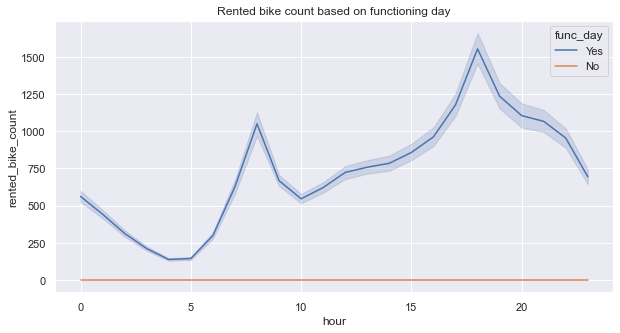

In [ ]:
# Rented bike count on func vs non func day
sns.lineplot(data = bike_df, x='hour', y = 'rented_bike_count', hue = 'func_day').set_title('Rented bike count based on functioning day')


* The above plot suggests that the people use bikes only on functioning day.
* Also it means from company's perspective, if anyone uses bike on a day then that is a funcitoning day.


### Exploring Numerical Features

In [ ]:
numerical_feat = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O' and feature not in ['weekday', 'month', 'date', 'year', 'rented_bike_count', 'hour'] ]
numerical_feat

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

Understanding the relation between various numerical features and dependent variable



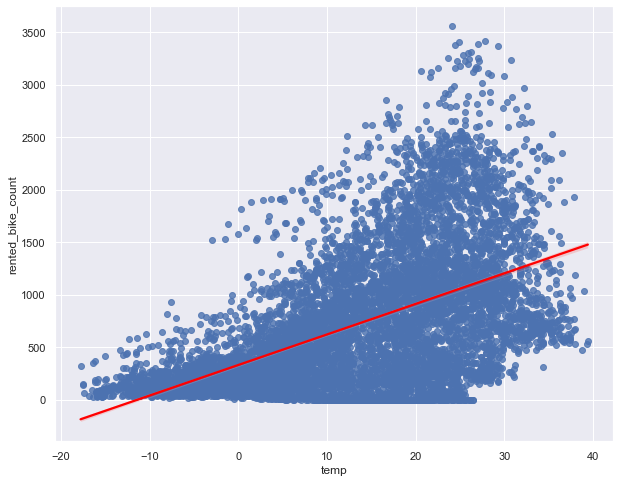

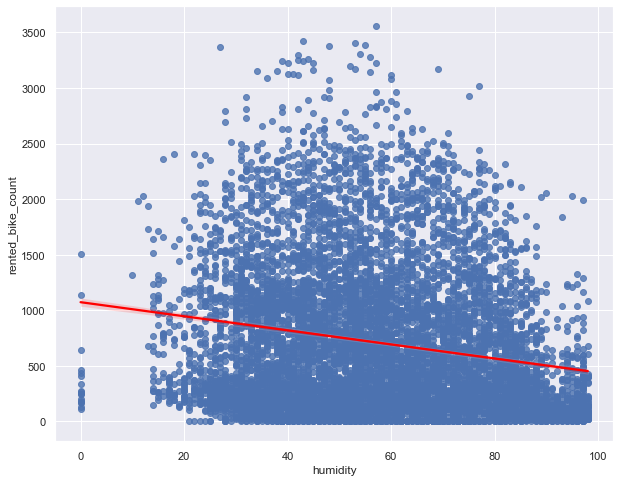

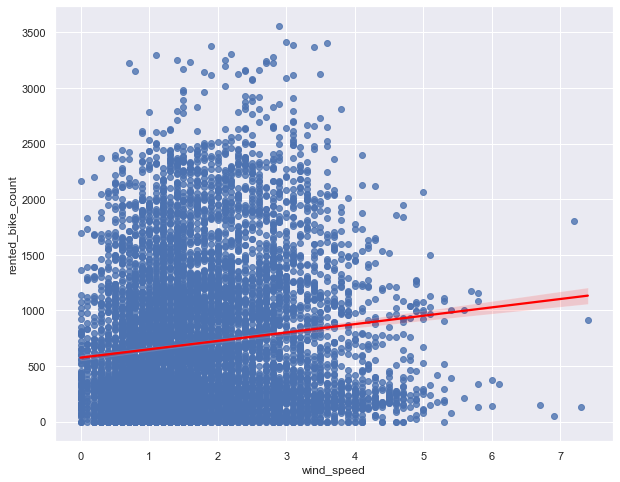

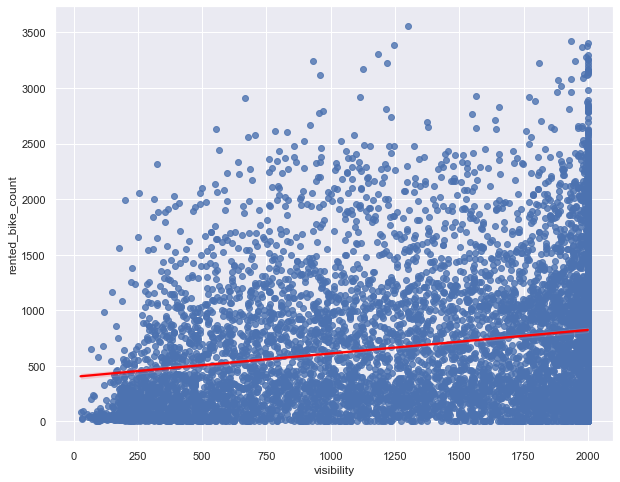

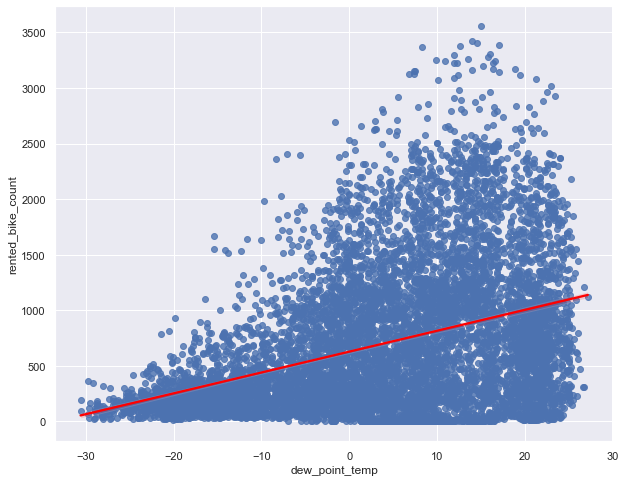

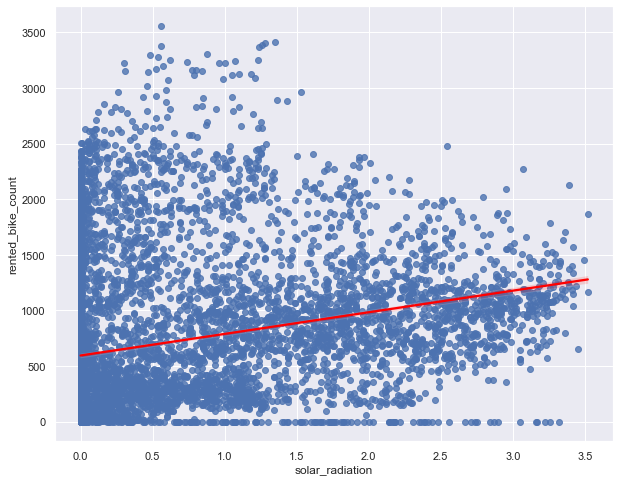

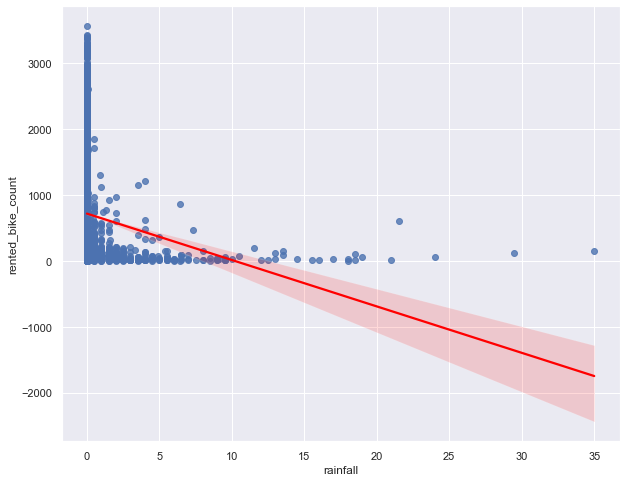

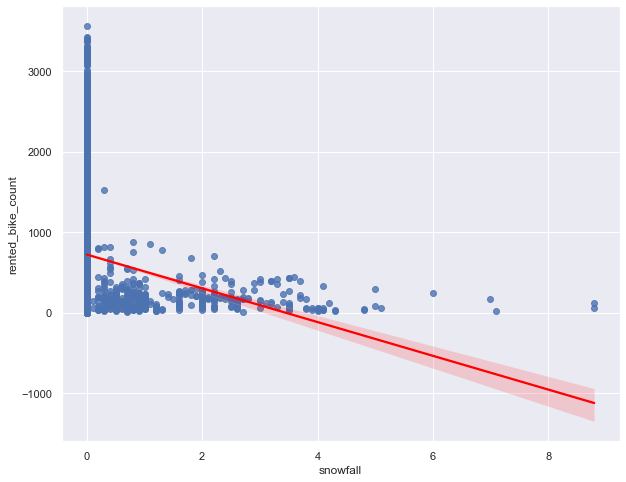

In [ ]:
# Plotting regression plot for each numerical feature 
plt.rcParams['figure.figsize'] = (10,8)
for feat in numerical_feat:
  plt.figure()
  sns.regplot( x =bike_df[feat], y = bike_df['rented_bike_count'], line_kws={"color": "Red"})

### Observation on relation between numerical fatures and dependent variable



*   **hour** - The demand for bike increases throughout the day, maximum at around 6 pm.
*   **temp** - Temperature is positively correlated with the people using bikes. The maximum is between 20 °C and 30 °C.
*   **humidity** - Humidity is the amount of water vapor in the air. Looking at the reg plot, people prefer using bikes when there is less humidity.
*   **visibility** - Visibility does not affect much still showing a slight positive correlation with people renting bike.
*   **snowfall and rainfall** - People don't prefer renting bike when there is ranifall or snowfall. 
*   **dew_point_temp** - The dew point temperature is positively correlated to the dependent variable.
*   **wind_speed** - The wind speed don't affect much the dependent variable.
*   **Solar_radiation** - Solar radiation seems to slightly positive correlated with the dependent variable.














###Understanding relation between other features and dependent variable

<AxesSubplot:xlabel='hour', ylabel='rented_bike_count'>

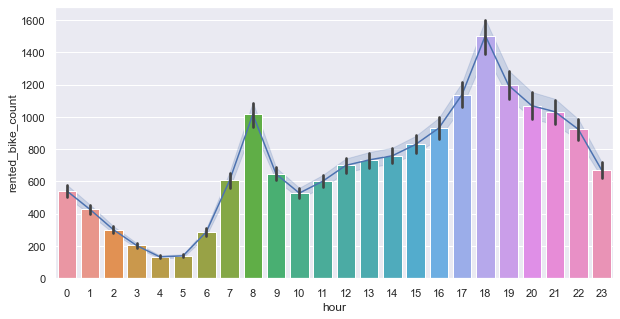

In [ ]:
# bar plot between hour and rented bike count
plt.figure(figsize = (10,5))
sns.lineplot( x = bike_df['hour'], y = bike_df['rented_bike_count'])
sns.barplot(x = bike_df['hour'], y = bike_df['rented_bike_count'])

From the above plot it seems that demand is high around 6-9 am and 7-9 pm.

<AxesSubplot:xlabel='hour', ylabel='rented_bike_count'>

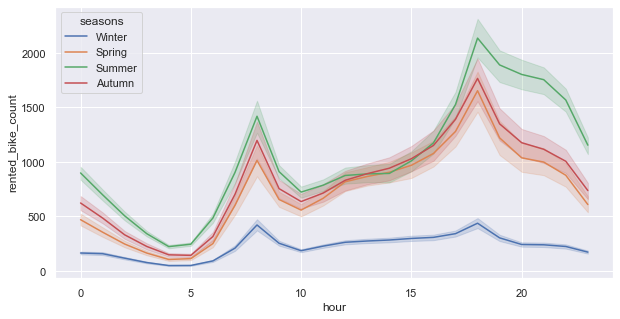

In [ ]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'hour', y = 'rented_bike_count', hue = 'seasons')



* The above plot indicates that people prefer renting bike more in summer season and least in winter season.
* The plot also indicates that people prefer renting bike in the evening at around 4pm to 8pm as well as in the morning 6-9am.
* Looking at the time it is possible that people going to offices use bikes for commute.




## Lets understand the correlation between variables.

<AxesSubplot:>

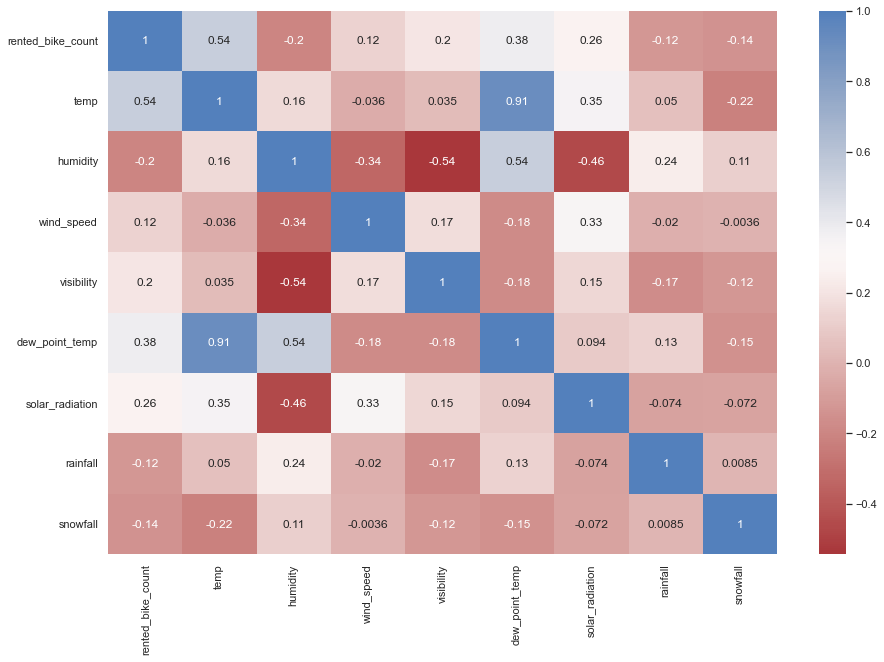

In [ ]:
# Understanding correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'vlag_r', center = 0.3)

            

*   Hour and temperature are highly correlated with bike count as compared to other features.
* Rainfall and snowfall are negatively correlated with rented bike count.
*  Dew point temp and temperature are highly correlated with each other, we can add them together.



In [ ]:
bike_df.head(2)

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


In [ ]:
# creating new features
bike_df['Temperature_and_dew_temp'] = bike_df['temp'] + bike_df['dew_point_temp']
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days,Temperature_and_dew_temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-24.6


In [ ]:
bike_df.drop(['temp', 'dew_point_temp'], axis =1, inplace = True)

<AxesSubplot:>

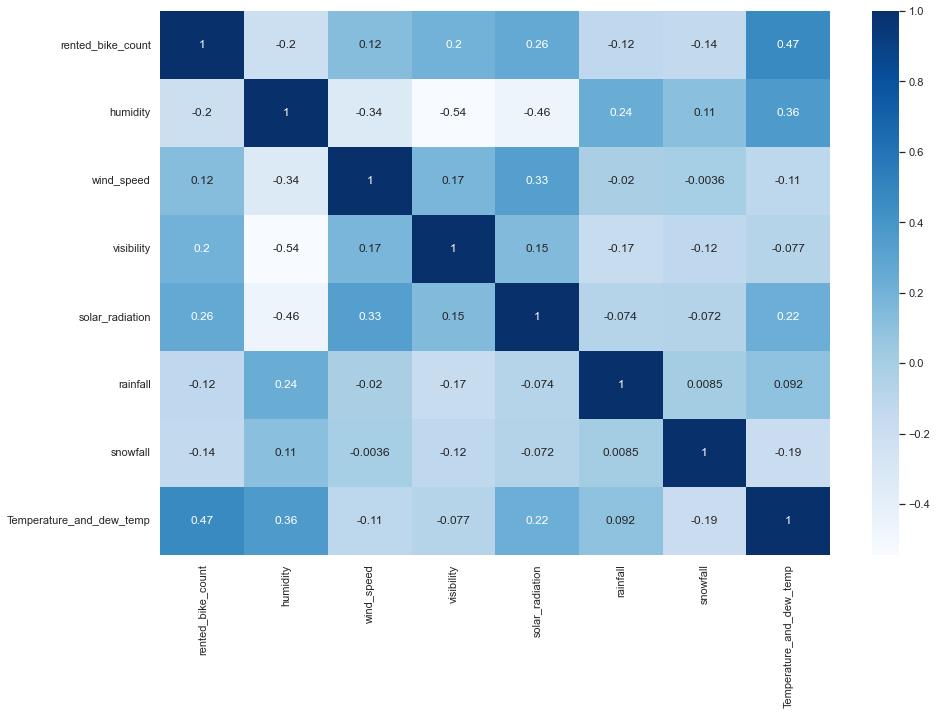

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues')

* Numerical features:
1. temperature and dew point temperature
2. solar radiation

###Detecting Multicollinearity

In [ ]:
# # #Detecting Muti- collinearity using Varaiation INflation Factor (VIF). 
# # The VIF directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question.
# # A VIF of 1 indicates that the feature has no correlation with any of the other features.
# # VIF more than 5 or 10 indicated that the features contribute sto collinearity
 
# # load statmodels functions
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # compute the vif for all given features
# def compute_vif(X):
    
# # create dataframe to store vif values
#     vif = pd.DataFrame()
#     vif["Variable"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif

# # features to consider removing
# considered_features = ['rented_bike_count','Temperature_and_dew_temp']


# # compute vif 
# compute_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented Bike Count'] ]])

### Creating dummy variables of categorical features

In [ ]:
# Encoding categorical variables
cat_feat = list(bike_df.select_dtypes(['object', 'category']).columns)
cat_feat = pd.Index(cat_feat)
cat_feat

Index(['hour', 'seasons', 'holiday', 'func_day', 'months_string', 'days'], dtype='object')

In [ ]:
# # One hot encoding
# #creating a copy of the dataframe
bike_data = bike_df.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in cat_feat:
  bike_data = one_hot_encoding(bike_data, col)



## Linear Regression Model

Linear regression have some assumptions which are as follows:



*   **Linear relationship**: Relationship between the target variable and the features should be linear.
*   **Little or No multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are correlated with each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error is the same across the data.



In [ ]:
# Assign independent variables to X and dependent variable to y
X = bike_data.iloc[:, 1:].values
y = np.sqrt(bike_data.iloc[:,0].values)

In [ ]:
# Split the data for train and test
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)


(7008, 52)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating function for model fitting and evaluation

In [ ]:
# Creating a function which will evaluate all the metric of the model and plot graph for the predicted vs actual graphs.
# Creating function will help reducing the time and shorten the code

#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

# making a function to train and evaluate linear model
def model_fitting_and_evaluation (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)
    
 # Checking the score
  print(f" THe score of the model is {model.score(X_train, y_train)}")
    
# Checking the coefficient
  #print(f'Coefficient of the model is {model.coef_}')
    
    
# predicting the result on train and test set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
     
   #calling libraries for evaluation metrics 
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
  print('\033[1m  ---------Evaluation_Matrix on Train set----------\033[0m')

   #finding mean_squared_error
  MSE  = mean_squared_error(y_train, y_pred_train)
  #print("MSE  :" , MSE)

   #finding root mean squared error
  RMSE = np.sqrt(MSE)
  
    
     #finding root mean squared error
  MAE = round(mean_absolute_error(y_train, y_pred_train),4)
 
    

   #finding the r2 score
  r2 = r2_score(y_train, y_pred_train)
  

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
  
    
    # Saving the metrics of train set in a dataframe
  train_dict = {'Model': 'Linear regression',
              'MAE': round((MAE), 4),
              'MSE':round((MSE),4),
              'RMSE':round((RMSE),4),
              'R2_score':round((r2),4),
              'Adjusted R2':round((adj_r2),3)
              }
  train_df = pd.DataFrame(train_dict, index =[1])
  print(train_df)

  print('\033[1m  ---------Evaluation_Matrix on Test set----------\033[0m')

   #finding mean_squared_error
  MSE_test  = mean_squared_error(y_test, y_pred_test)
  #print("MSE  :" , MSE)

   #finding root mean squared error
  RMSE_test = np.sqrt(MSE_test)
  
    
     #finding root mean squared error
  MAE_test = round(mean_absolute_error(y_test, y_pred_test),4)
 
    

   #finding the r2 score
  r2_test = r2_score(y_test**2, y_pred_test**2)
  

  #finding the adjusted r2 score
  adj_r2_test=1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
    
    # Saving the metrics of train set in a dataframe
  train_dict = {'Model': 'Linear regression_test',
              'MAE': round((MAE_test), 4),
              'MSE':round((MSE_test),4),
              'RMSE':round((RMSE_test),4),
              'R2_score':round((r2_test),4),
              'Adjusted R2':round((adj_r2_test),3)
              }
  train_df = pd.DataFrame(train_dict, index =[2])
  print(train_df)
  
#   print('\n================Evalution Matrix=========================\n')
  

# #appending metrice to list
#   mean_sq_error.append(MSE)
#   root_mean_sq_error.append(RMSE)
#   r2_list.append(r2)
#   adj_r2_list.append(adj_r2)

#      # ploting the line graph of actual and predicted values
  print('\n Evalution Graph :Predicted vs Actual values\
   ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('No of Test Data')
  plt.ylabel('Values')
  plt.show()

In [ ]:
# Fitting a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Cross Validation of Linear regression**

In [ ]:
#cross validation to cross validate the data to confirm the reliability of the model. 
#As well as, to check whether the data has been distributed unifrmly or not.
from sklearn.model_selection import cross_val_score

mse_crossval = cross_val_score(lr, X,y, scoring = "neg_mean_squared_error", cv =7)
mean_mse_crossval = np.mean(mse_crossval)
mean_mse_crossval

-149380.47752920142

More the value toward zero, better will be the model

 THe score of the model is 0.7013039999974215
  ---------Evaluation_Matrix on Train set----------
               Model       MAE          MSE     RMSE  R2_score  Adjusted R2
1  Linear regression  267.1358  124031.4293  352.181    0.7013        0.699
  ---------Evaluation_Matrix on Test set----------
                    Model       MAE       MSE      RMSE  R2_score  Adjusted R2
2  Linear regression_test  267.4353  125220.0  353.8644    0.6358        0.692

 Evalution Graph :Predicted vs Actual values   ===================================================



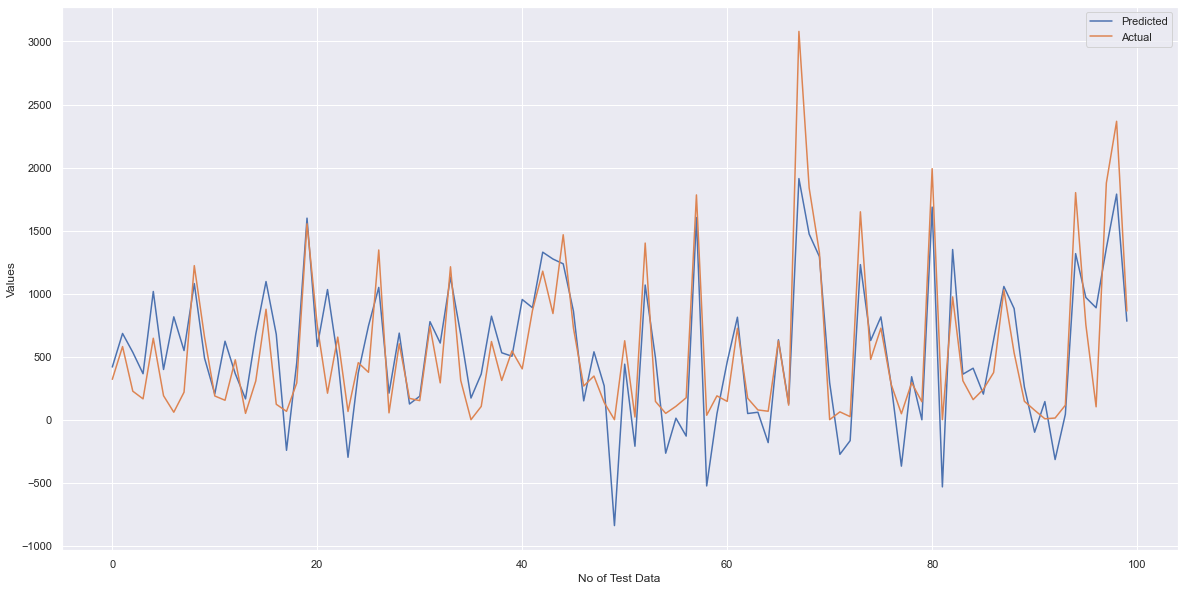

In [ ]:
# Checking the score
#lr.score(X_train, y_train)

model_fitting_and_evaluation(lr,X_train,y_train,X_test,y_test )

As, we can see, our model is performing good with adjusted r2 value of train and test as .77 and .78 respectively.This indicates the model is fitted in a balanced manner. 
But further, we will try to improve the model more by applying regularization methods or by deature engineering.

In [ ]:
# Lets see the coefficient of the regression model

lr.coef_

array([-1.85718995e+01, -4.54155116e-01,  2.25977098e+00,  3.41414479e+00,
       -5.22165894e+01, -2.26032105e-01,  2.99388330e+01, -1.96064876e+00,
       -4.88518405e+00, -7.20724752e+00, -9.44056745e+00, -9.08807002e+00,
       -4.03169099e+00,  2.18108305e+00,  7.55391492e+00,  1.26168421e+00,
       -3.23147904e+00, -3.44746893e+00, -2.72716437e+00, -2.84312922e+00,
       -2.80776933e+00, -1.66500612e+00,  2.52148544e-01,  3.91384952e+00,
        1.04461884e+01,  6.81672655e+00,  6.01424339e+00,  6.32874805e+00,
        5.04769355e+00,  1.53492491e+00,  6.41853054e+12,  1.39211632e+13,
        1.40917277e+13,  3.29653345e+00,  2.85977153e+01, -7.50263269e+12,
       -7.67319714e+12, -7.67319714e+12, -7.67319714e+12, -7.50263269e+12,
       -7.50263269e+12, -9.47799144e-01,  1.92249610e+00,  6.41853054e+12,
        6.41853054e+12,  6.41853054e+12, -1.31862106e+00, -1.15585745e+00,
       -2.75551980e+00, -5.64653605e-01, -4.54954835e-01, -4.16006594e-01])

In [ ]:
#intercept of the regression model
lr.intercept_

-6418530543061.954

### Lasso Regression

 Lasso Regression takes the magnitude of the slope. It not only helps in, reducing the overfitting but also helps in feature selection for the model.

In [ ]:
# Creating an instance of Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
#lasso = Lasso(alpha = 0.01,max_iter = 50)

 THe score of the model is 0.16895301532007623
  ---------Evaluation_Matrix on Train set----------
               Model     MAE       MSE     RMSE  R2_score  Adjusted R2
1  Linear regression  9.0318  128.2581  11.3251     0.169        0.163
  ---------Evaluation_Matrix on Test set----------
                    Model     MAE       MSE     RMSE  R2_score  Adjusted R2
2  Linear regression_test  9.1764  133.6815  11.5621    0.1512        0.125

 Evalution Graph :Predicted vs Actual values   ===================================================



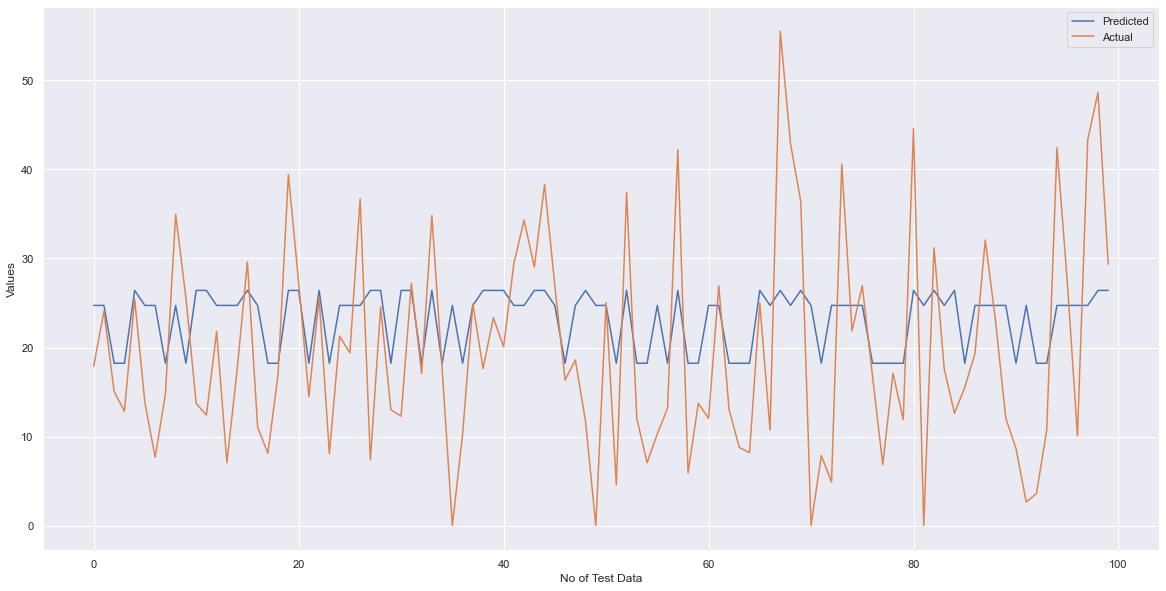

In [ ]:
#fitting model and evaluate metrics
model_fitting_and_evaluation(lasso,X_train,y_train,X_test,y_test)

#### Cross Validation

In [ ]:
#cross validation to cross validate the data to confirm the reliability of the model. 
#As well as, to check whether the data has been distributed unifrmly or not.
from sklearn.model_selection import cross_val_score

mse_crossval_lasso = cross_val_score(lasso, X,y, scoring = "neg_mean_squared_error", cv =7)
mean_mse_crossval_lasso = np.mean(mse_crossval_lasso)
mean_mse_crossval_lasso

-99.39219380732445

As we can see that our r2 score of train and test is found to be .74 and .75 respectively. Let's try to hypertune the parameter and let's see whether we can get even better parameter heading towards better model accuracy

### Hypertuning Lasso by GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014],
             'max_iter': [50,100,500,1000,2000,5000,10000,15000]}
lasso_reg = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.812e+04, tolerance: 8.747e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.528e+04, tolerance: 8.603e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

 THe score of the model is -34.25177662828295
  ---------Evaluation_Matrix on Train set----------
               Model     MAE      MSE    RMSE  R2_score  Adjusted R2
1  Linear regression  4.4079  34.2518  5.8525    0.7781        0.776
  ---------Evaluation_Matrix on Test set----------
                    Model     MAE      MSE   RMSE  R2_score  Adjusted R2
2  Linear regression_test  4.3934  33.5008  5.788    0.7873        0.781

 Evalution Graph :Predicted vs Actual values   ===================================================



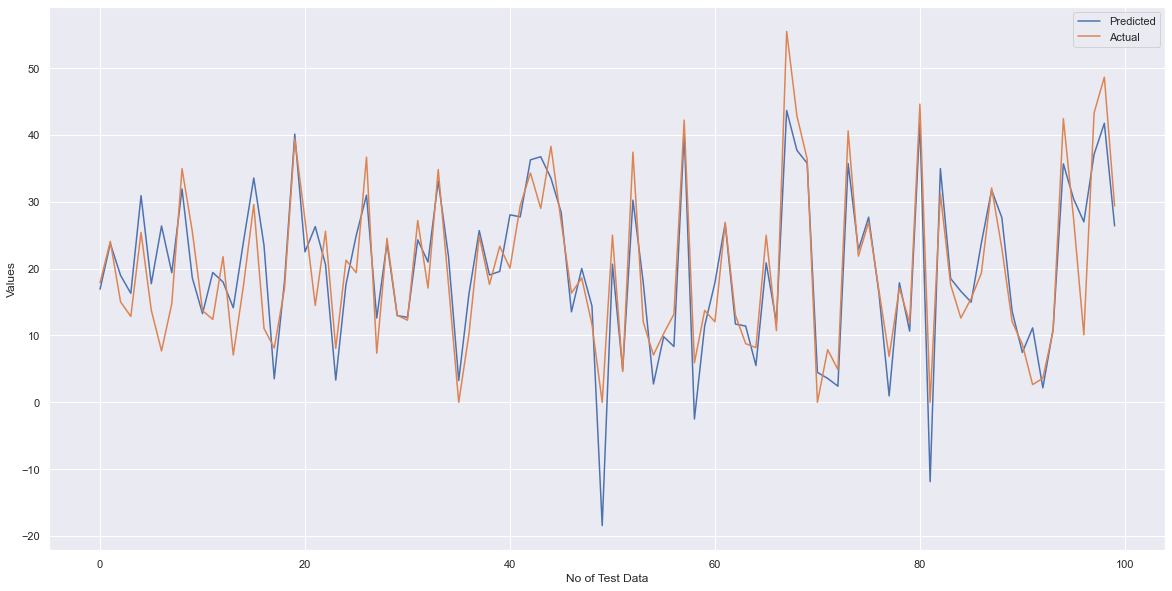

In [ ]:
model_fitting_and_evaluation(lasso_reg,X_train,y_train,X_test,y_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_reg.best_params_)
print("\n and the negative mean squared error is: ", lasso_reg.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'max_iter': 50}

 and the negative mean squared error is:  -34.89505646934771


We can see that hypertuning of parameters has increased the model performance from 0.75 to .78 on test dataset.

### Ridge Regression

        Ridge regressionn regularization squares the slope and is useful for the cases where most of the features are important. Also, it should be mostly used when the regression line is very steep in nature

In [ ]:
#creating an instance to create ridge object
from sklearn.linear_model import Ridge
ridge = Ridge()

 THe score of the model is 0.7777830039565504
  ---------Evaluation_Matrix on Train set----------
               Model     MAE      MSE    RMSE  R2_score  Adjusted R2
1  Linear regression  4.4191  34.2954  5.8562    0.7778        0.776
  ---------Evaluation_Matrix on Test set----------
                    Model     MAE      MSE    RMSE  R2_score  Adjusted R2
2  Linear regression_test  4.4097  33.6672  5.8023    0.7862         0.78

 Evalution Graph :Predicted vs Actual values   ===================================================



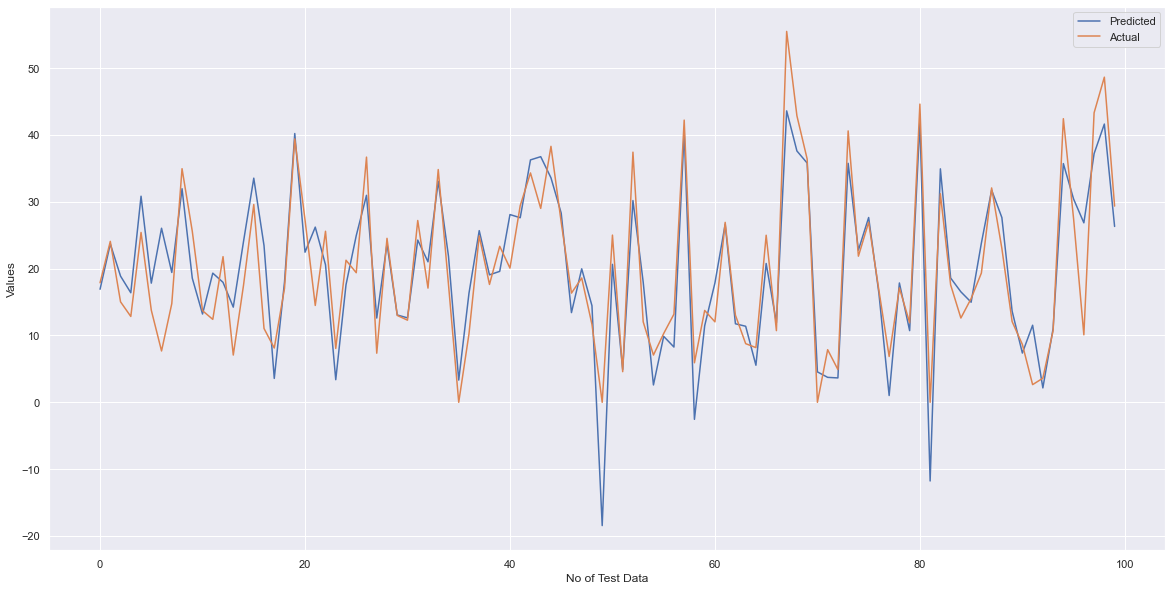

In [ ]:
#fitting the model and evaluating the metrics
model_fitting_and_evaluation(ridge,X_train,y_train,X_test,y_test)

#### Cross validation of ridge

In [ ]:
mse_crossval_ridge = cross_val_score(ridge, X,y, scoring = "neg_mean_squared_error", cv =7)
mean_mse_crossval_ridge = np.mean(mse_crossval_ridge)
mean_mse_crossval_ridge

-41.73888108731153

#### Hypertuning the Ridge parameter

In [ ]:

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


 THe score of the model is -34.24925996838199
  ---------Evaluation_Matrix on Train set----------
               Model     MAE      MSE    RMSE  R2_score  Adjusted R2
1  Linear regression  4.4066  34.2493  5.8523    0.7781        0.776
  ---------Evaluation_Matrix on Test set----------
                    Model     MAE      MSE    RMSE  R2_score  Adjusted R2
2  Linear regression_test  4.3923  33.4826  5.7864    0.7874        0.781

 Evalution Graph :Predicted vs Actual values   ===================================================



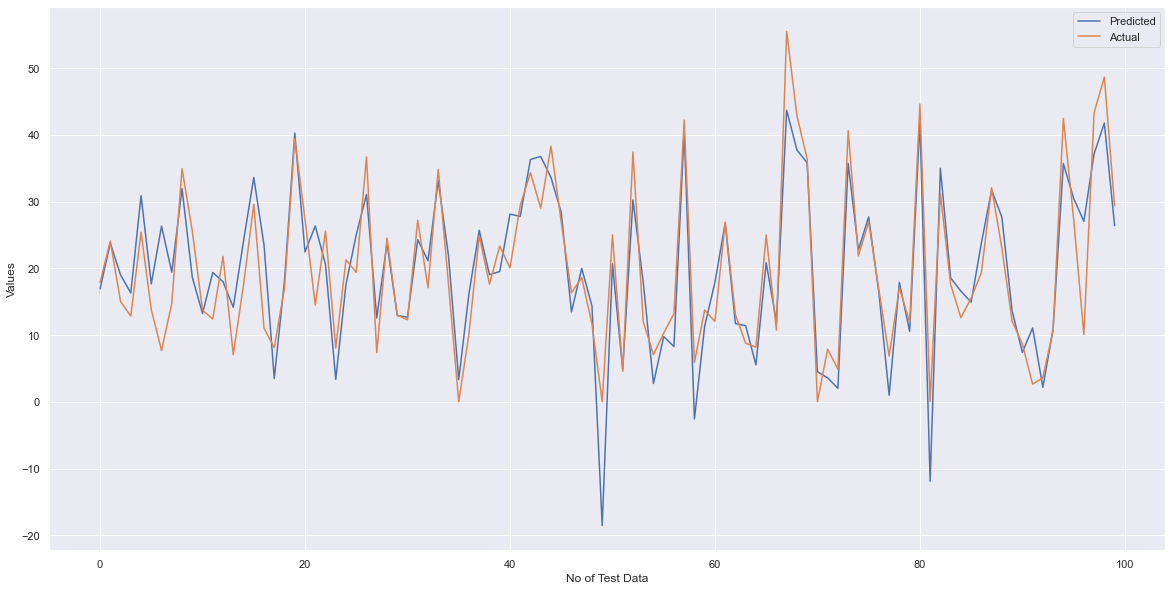

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

model_fitting_and_evaluation(ridge_reg,X_train,y_train,X_test,y_test)

In [ ]:
#printing the best parameter which were found by gridsearchCV
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)
print("\n and the negative mean squared error is:", ridge_reg.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

 and the negative mean squared error is: -34.878007765016676


As compared to linear regression which have negative mean squared error of -41.7, ridge regression performed even worst with -57.84, while lasso regularization worked well comparitevely with negative mean squared error of  -34.93

### Elastic Net Regresion:

        Elastic net regularization works best, as it can be said as the combination of lasso and ridge regression. In generalized scenario elastic net enhances model performace.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_reg = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.485e+04, tolerance: 8.747e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.217e+04, tolerance: 8.603e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

 THe score of the model is -34.25615743599819
  ---------Evaluation_Matrix on Train set----------
               Model     MAE      MSE    RMSE  R2_score  Adjusted R2
1  Linear regression  4.4107  34.2562  5.8529     0.778        0.776
  ---------Evaluation_Matrix on Test set----------
                    Model     MAE      MSE    RMSE  R2_score  Adjusted R2
2  Linear regression_test  4.3977  33.5427  5.7916     0.787         0.78

 Evalution Graph :Predicted vs Actual values   ===================================================



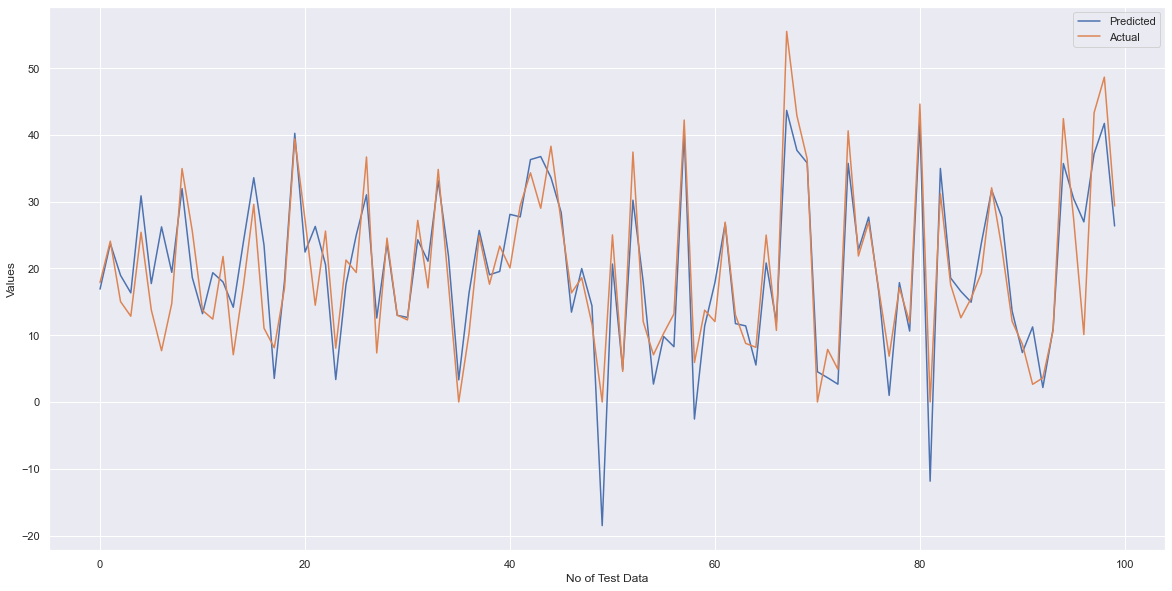

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
model_fitting_and_evaluation(elastic_reg,X_train,y_train,X_test,y_test)

In [ ]:
#printing the best parameter which were found by gridsearchCV
print("The best fit alpha value is found out to be :" ,elastic_reg.best_params_)
print("\n and the negative mean squared error is:", elastic_reg.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.5}

 and the negative mean squared error is: -34.89601388490334


C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

Text(0.5, 1.0, 'elastic net regularization')

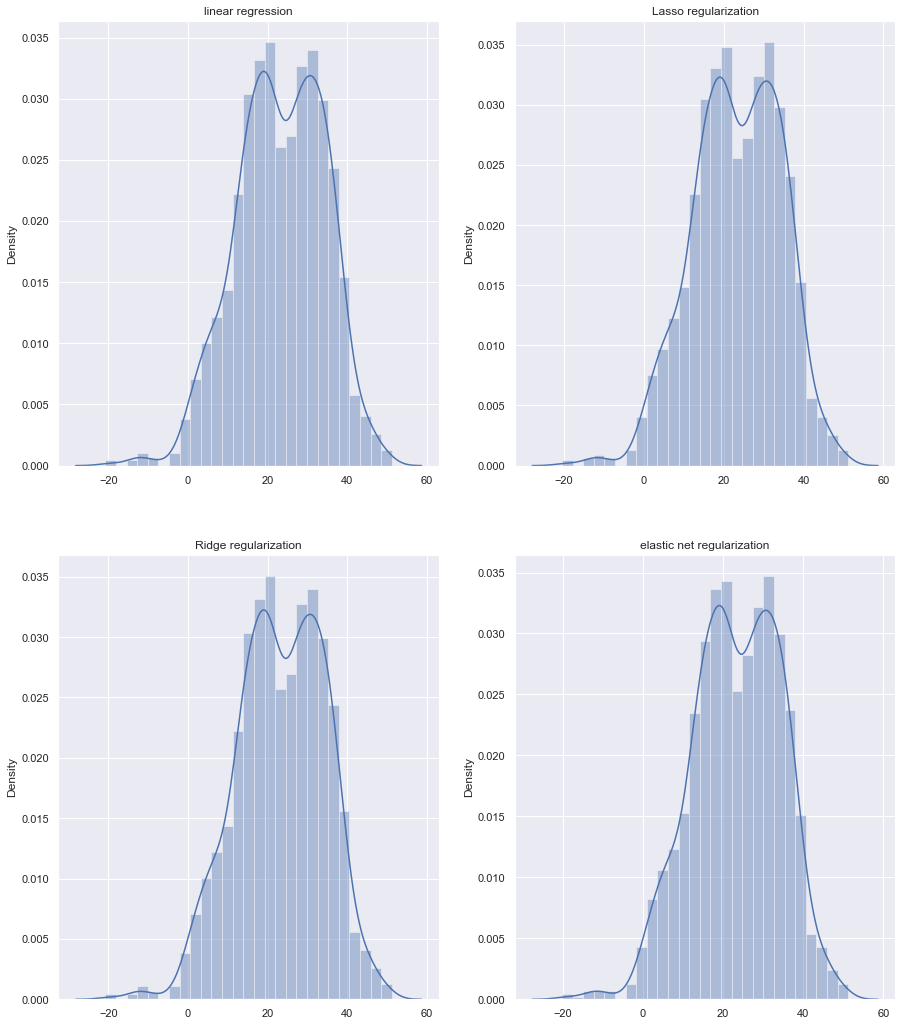

In [ ]:
#lets see the plot of predicted y of all the model and the distribution of curve to pictorally visualized the difference


y_pred_test_linear = lr.predict(X_test)
y_pred_test_lasso= lasso_reg.predict(X_test)
y_pred_test_ridge= ridge_reg.predict(X_test)
y_pred_test_elastic= elastic_reg.predict(X_test)



plt.figure(figsize =(15,18))

plt.subplot(2,2,1)
sns.distplot(y_pred_test_linear)
plt.title('linear regression')
plt.subplot(2,2,2)
sns.distplot(y_pred_test_lasso)
plt.title('Lasso regularization')
plt.subplot(2,2,3)
sns.distplot(y_pred_test_ridge)
plt.title('Ridge regularization')
plt.subplot(2,2,4)
sns.distplot(y_pred_test_elastic)
plt.title('elastic net regularization')

## Decision Tree

Although decision tree is mostly used for classification problem but decision tree works best when we have many outliers in the dataset for regression analysis. As, in this case we have many outliers with very skewed data. So, we are hoping that this model would work better than linear regression.

In [ ]:
#Assigning the dependedent and independent variable
X = bike_data.iloc[:, 1:]

# Data for the dependent variable
y = bike_df['rented_bike_count']


In [ ]:
#Splitting in the training dataset and the test dataset
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(7008, 52) (7008,)
(1752, 52) (1752,)


In [ ]:
#importing the library to apply the algorithm
from sklearn.tree import DecisionTreeRegressor

#creating a decision tree regressor object from decision tree regressor class
dt_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', min_samples_leaf=2, random_state =0)

#fitting decision tree regressor to the train dataset
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2, random_state=0)

In [ ]:
#predicting the target feature on the test and train dataset
y_predicted_dtreg = dt_reg.predict(X_test)
y_predictedtrain_dtreg = dt_reg.predict(X_train)

#### Model evaluation

In [ ]:
from sklearn import metrics
#Model evaluation using r2
r_square_dt = metrics.r2_score(y_test, y_predicted_dtreg)
r_squaretrain_dt = metrics.r2_score(y_train, y_predictedtrain_dtreg)
print('R2 score of decision tree regressor is {} on train dataset, {} on test dataset'.format(r_squaretrain_dt,r_square_dt))

R2 score of decision tree regressor is 0.9844724378043357 on train dataset, 0.8138206578088891 on test dataset


#### View the decision tree

In [ ]:
#importing the required library
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from sklearn import tree
from graphviz import Source


In [ ]:
graph = Source(tree.export_graphviz(dt_reg, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

'C:\Users\ASUS' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Kdot', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\ASUS' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

C:\Users\ASUS VivoBooK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

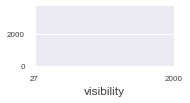

In [ ]:

#!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt_reg, X, y,
                feature_names=X_train.columns)
viz

[Text(0.5367299251122076, 0.9864864864864865, 'X[6] <= 8.45\nsquared_error = 415243.021\nsamples = 7008\nvalue = 708.941'),
 Text(0.188865599523394, 0.9594594594594594, 'X[32] <= 0.5\nsquared_error = 98080.39\nsamples = 2586\nvalue = 338.484'),
 Text(0.0819506119247013, 0.9324324324324325, 'X[3] <= 0.005\nsquared_error = 169724.341\nsamples = 880\nvalue = 561.005'),
 Text(0.040634373006319155, 0.9054054054054054, 'X[30] <= 0.5\nsquared_error = 115593.165\nsamples = 522\nvalue = 410.322'),
 Text(0.02669222908313054, 0.8783783783783784, 'X[0] <= 61.5\nsquared_error = 133740.326\nsamples = 269\nvalue = 525.03'),
 Text(0.01609595071693124, 0.8513513513513513, 'X[6] <= -1.35\nsquared_error = 140488.913\nsamples = 144\nvalue = 666.896'),
 Text(0.012377059355036128, 0.8243243243243243, 'X[24] <= 0.5\nsquared_error = 96500.058\nsamples = 83\nvalue = 494.88'),
 Text(0.01200755181044263, 0.7972972972972973, 'X[25] <= 0.5\nsquared_error = 75173.331\nsamples = 81\nvalue = 471.049'),
 Text(0.010712

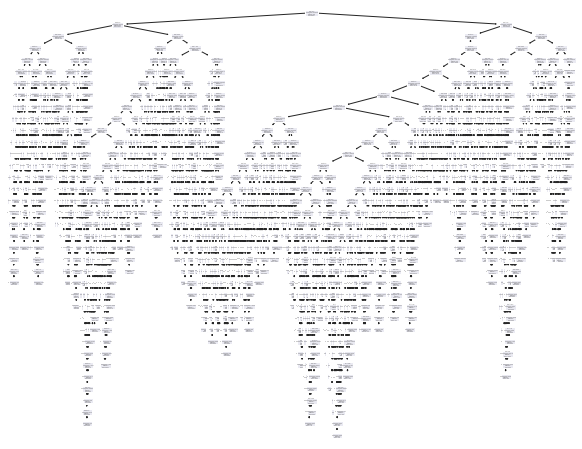

In [ ]:
tree.plot_tree(dt_reg)

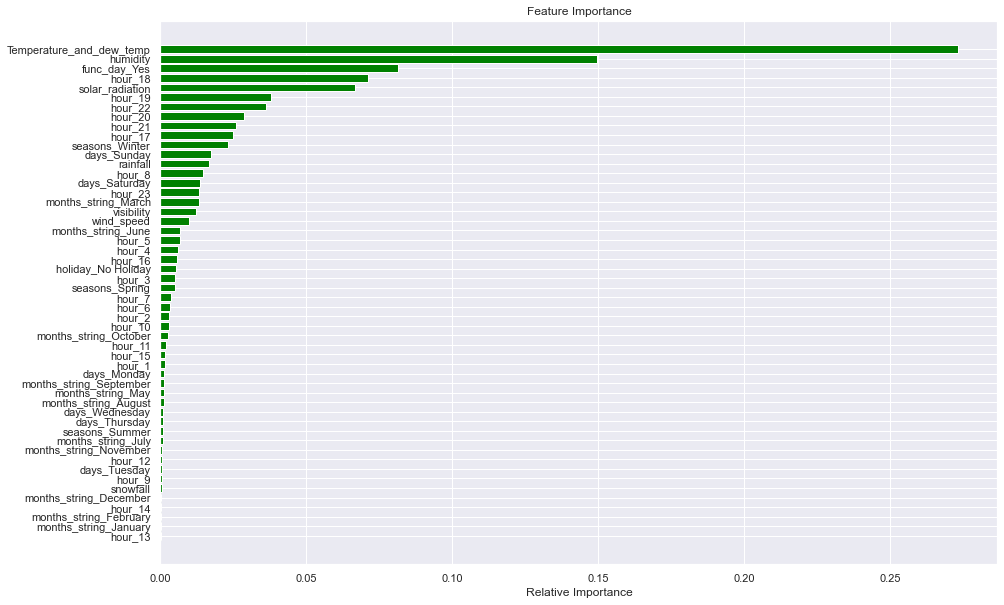

In [ ]:
#def get_features_importance (optimal_model,X_train):

features = X_train.columns
importances = dt_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

dt_grid= GridSearchCV(dt_reg, param_dict, scoring='neg_mean_squared_error', cv=5)

In [ ]:
dt_grid.fit(X_train, y_train)

ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                      random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

## Random Forest

In [ ]:
#creating a random forest object
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [ ]:
#fitting the model on training dataset
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#finding the score
rf_reg.score(X_train, y_train)

0.9864723577979871

In [ ]:
#predicting the result on train and test set

yrf_pred_test = rf_reg.predict(X_test)
yrf_pred_train = rf_reg.predict(X_train)

#### Evaluation metrics

In [ ]:
#Model evaluation using r2
r_square_dt = metrics.r2_score(y_test, yrf_pred_test)
r_squaretrain_dt = metrics.r2_score(y_train, yrf_pred_train)
print('R2 score of random forest regressor is:\n \n'
      'train dataset: {} ,\n \ntest dataset: {}'.format(r_squaretrain_dt,r_square_dt))

R2 score of random forest regressor is:
 
train dataset: 0.9864723577979871 ,
 
test dataset: 0.8949800748284281


### Random Forest with hyper parameter adjusted via GridSearchCV

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,8,10,15,20]

# Minimum number of samples required to split a node
min_samples_split = [20, 50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2,10,50]

#maximum number of leaf nodes
max_leaf_nodes=[40,60,80]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_leaf_nodes': max_leaf_nodes}

In [ ]:
# Grid search to search the best parameter for random forest
rf_grid = GridSearchCV(estimator=rf_reg,
                       param_grid = param_dict,
                       cv = 5, scoring='neg_mean_squared_error')

#fitting the regressor with deifned search parameter to the model
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 10, 15, 20],
                         'max_leaf_nodes': [40, 60, 80],
                         'min_samples_leaf': [2, 10, 50],
                         'min_samples_split': [20, 50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#predicting the target feature on the test and train dataset
y_predicted_rfreg = dt_reg.predict(X_test)
y_predictedtrain_rfreg = dt_reg.predict(X_train)

In [ ]:
#Calculating the mean squared error on train and test dataset
mse_test= mean_squared_error(y_test, y_predicted_rfreg)

mse_train= mean_squared_error(y_train, y_predictedtrain_rfreg)


print(f'Mean squared error : \n train set: {mse_train} \n \n test set: {mse_test}')

Mean squared error : 
 train set: 6447.7118293379 
 
 test set: 77920.26021055302


In [ ]:
#Model evaluation using r2
r_square_dt = metrics.r2_score(y_test, y_predicted_rfreg)
r_squaretrain_dt = metrics.r2_score(y_train, y_predictedtrain_rfreg)
print(f'R2 score of hypertuned random forest regressor is:\n \ntrain dataset: {r_squaretrain_dt} \n \ntest dataset: {r_square_dt}')

R2 score of hypertuned random forest regressor is:
 
train dataset: 0.9844724378043357 
 
test dataset: 0.8138206578088891


In [ ]:
#best parameter for the random forest model
optimal_rf_model=rf_grid.best_estimator_
optimal_rf_model

RandomForestRegressor(max_depth=20, max_leaf_nodes=80, min_samples_leaf=2,
                      min_samples_split=20, n_estimators=80)

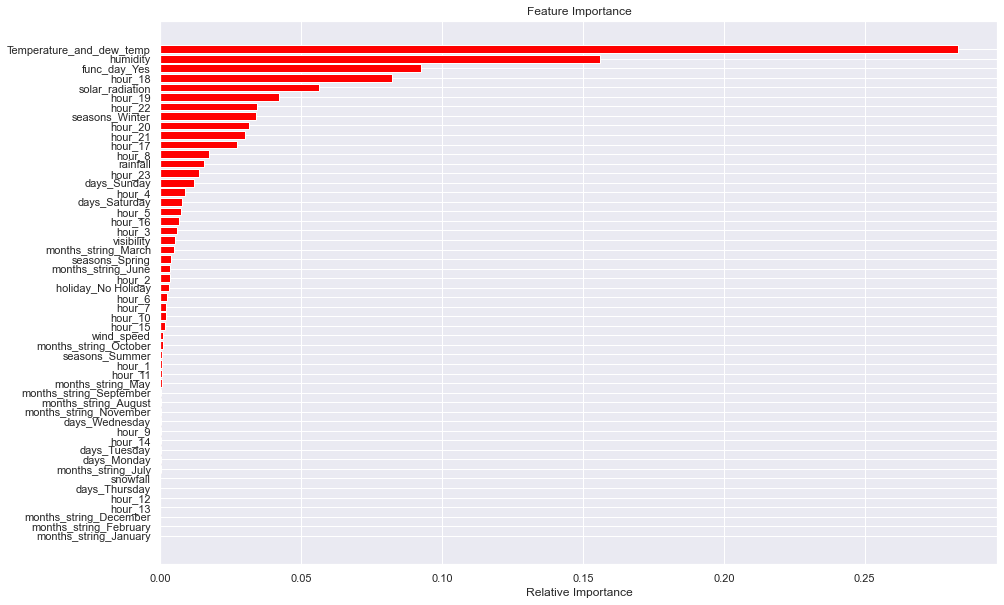

In [ ]:
#def get_features_importance (optimal_model,X_train):

features = X_train.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Gradient Boost 

In [ ]:
#importing the library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating an isntance to store the gradient boosting regressor object
gb_reg = GradientBoostingRegressor()

#### Hypertuning using GridSearch CV

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

#grid search for gradient bossting
gb_grid= GridSearchCV(gb_reg,param_grid=params,verbose=0)

#fitting the model
gb_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:

#creating a function to predict the train and test data
def predict_model(model):
    y_predicted_rfreg = dt_reg.predict(X_test)
    y_predictedtrain_rfreg = dt_reg.predict(X_train)
 
#Calculating the mean squared error on train and test dataset
    mse_test= mean_squared_error(y_test, y_predicted_rfreg)

    mse_train= mean_squared_error(y_train, y_predictedtrain_rfreg)

    print(f'Mean squared error : \n train set: {mse_train} \n \n test set: {mse_test}\n')
    
 #Model evaluation using r2
    r_square_dt = metrics.r2_score(y_test, y_predicted_rfreg)
    r_squaretrain_dt = metrics.r2_score(y_train, y_predictedtrain_rfreg)
    print(f'R2 score of hypertuned model is: \ntrain dataset: {r_squaretrain_dt} \n \ntest dataset: {r_square_dt}')   

In [ ]:
#predicting the target feature on the test and train datase
predict_model(gb_grid)

Mean squared error : 
 train set: 6447.7118293379 
 
 test set: 77920.26021055302

R2 score of hypertuned model is: 
train dataset: 0.9844724378043357 
 
test dataset: 0.8138206578088891


In [ ]:
#finding out the best estimator
optimal_grid = gb_grid.best_estimator_


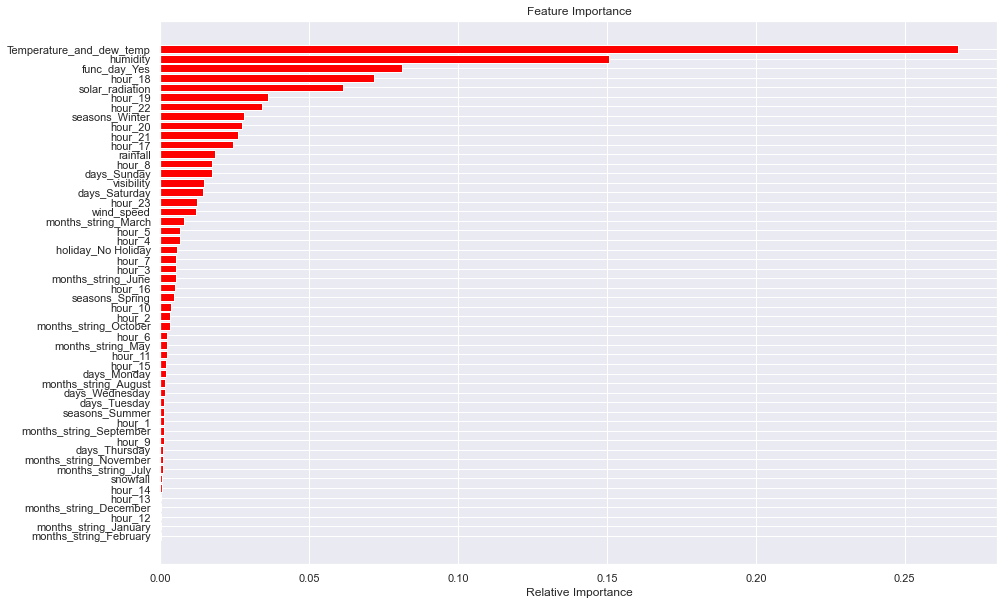

In [ ]:
#plotting a graph for feature importance
#def get_features_importance (optimal_model,X_train):

features = X_train.columns
importances = optimal_grid.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## XG Boosting

In [ ]:
#importing library
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[50,100,150]
max_depth=[15,20,30, 50]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [ ]:
#predicting the target feature on the test and train datase
predict_model(xgb_grid)

Mean squared error : 
 train set: 6447.7118293379 
 
 test set: 77920.26021055302

R2 score of hypertuned model is: 
train dataset: 0.9844724378043357 
 
test dataset: 0.8138206578088891


In [ ]:
#finding out the best estimator
optimal_xgb_model=xgb_grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
xgb_grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

#### Combining the performace of all the models

In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,
                    'Root_Mean_square_error':root_mean_sq_error,
                    'R2':r2_list,
                    'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made like 'Gradient_Boosting',,'CATBoost'
model_name=['Linear',
            'Lasso',
            'Ridge',
            'Elasticnet',
            'Decision_Tree',
            'Random_Forest',
            'Gradient_Boosting',
            'Xtreme_GB']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index")